<a href="https://colab.research.google.com/github/Soumanti25/calorie-burned-prediction-using-regression/blob/main/Calorie_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import plotly.express as px

UPLOADING THE DATASET


In [2]:
uploaded = files.upload()

Saving calories (1).csv to calories (1).csv
Saving exercise (1).csv to exercise (1).csv


In [3]:
import io
calories = pd.read_csv(io.BytesIO(uploaded['calories (1).csv']))
exercise = pd.read_csv(io.BytesIO(uploaded['exercise (1).csv']))

OVERVIEW OF THE DATASET

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


MERGING THE TWO DATASETS

In [6]:
exercise_df = exercise.merge ( calories , on = 'User_ID')

In [7]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


NUMBER OF COLUMNS AND INSTANCES IN THE DATASET

In [8]:
print("The dataset has" , exercise_df.shape[0] , "instances and" , exercise_df.shape[1] , "columns.")

The dataset has 15000 instances and 9 columns.


LET'S PRINT THE NAME OF THE COLUMNS

In [9]:
print("Columns :")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns) :
  print("\t" , i+1 , "." , column)

Columns :
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


1. User_ID : Unique ID for each individual
2. Gender : Gender of the person
3. Age : Age of the person
4. Height : Height of the person in centimeter
5. Weight : Weight of the person in kilogram
6. Duration : Duration of exercise of the person
7. Heart_Rate : Heart rate of the person (in per minute)
8. Body_Temp : Body temperature of the person (in celcius)
9. Calories : Amount of calories burnt (in kilocalories)

OVERALL STATISTIC OF THE DATASET


In [10]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000




*   The above table shows the Descriptive Statistics of each feature given in the data
*   Consider for example the weight column. 25% of the data lie between the value 36 kilogram to 63 kilogram. The next 25% lie between 63 kilogram and 74 kilogram and so on.







OVERALL INFORMATION OF THE DATASET

In [11]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


NULL VALUES

Let's check first whether there is any null value in the dataset or not. Simple way to check this is using a heatmap as shown below.

<Axes: >

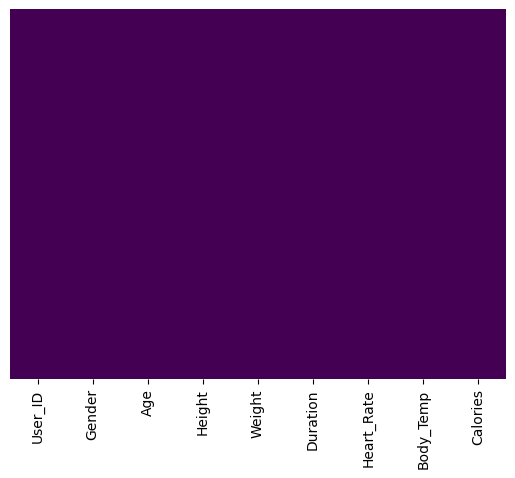

In [12]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

So the good news is that our dataset is free of any null values. So we need not do any kind of manipulations with it.

Next let's find whether there is any duplicate data in User_ID column

In [13]:
print("Shape of dataset before dropping duplicates is :" , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'] , keep = 'last' , inplace = True )
print("Shape of dataset after dropping duplicates is :" , exercise_df.shape)

Shape of dataset before dropping duplicates is : (15000, 9)
Shape of dataset after dropping duplicates is : (15000, 9)


As the shape of dataset before dropping duplicates and the shape of dataset after dropping duplicates are same, there is no duplicate data in the User_ID column in the dataset. So no chance of data leakage.

Now let's drop the User_ID column as it is unnecessary for our analysis

In [14]:
exercise_df.drop(columns = "User_ID" , inplace = True)

Now let's split the data into training set and test set

In [15]:
exercise_train , exercise_test = train_test_split(exercise_df , train_size =0.8 , random_state = 1)

Now let's print the shapes of training and test data

In [16]:
print("Shape of training data :" , exercise_train.shape)
print("Shape of test data :" , exercise_test.shape)

Shape of training data : (12000, 8)
Shape of test data : (3000, 8)


DISTRIBUTION OF THE DATASET

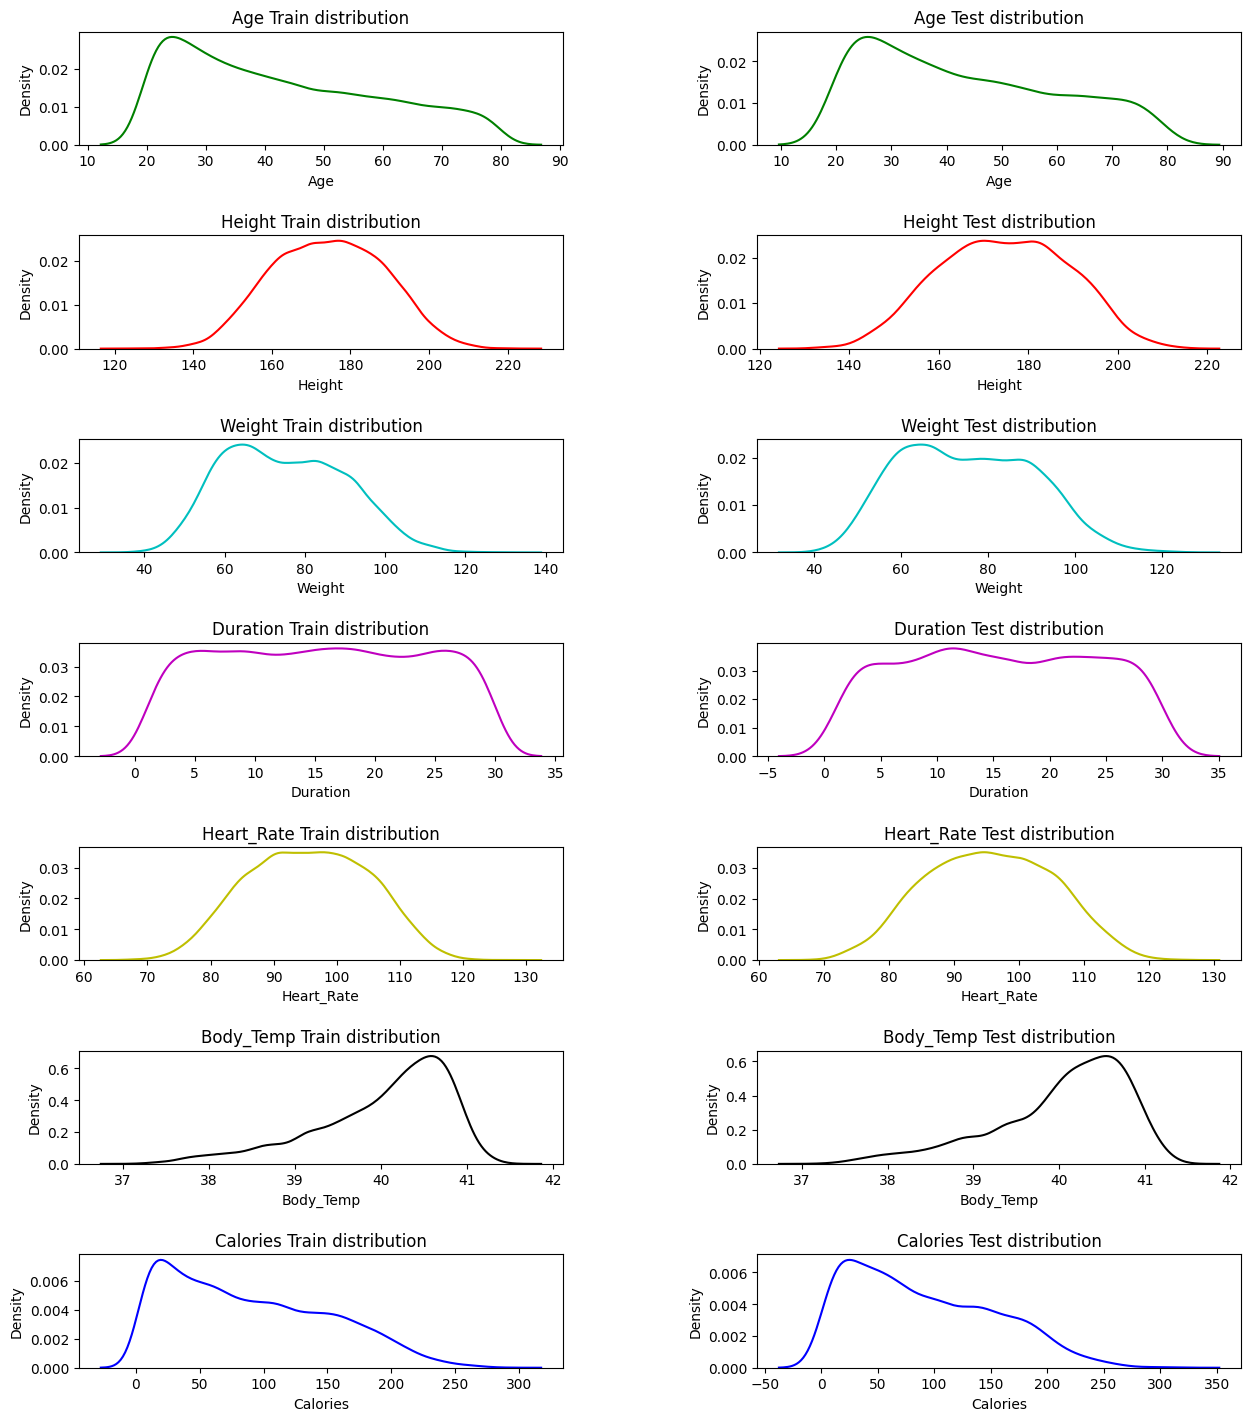

In [17]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'b']
fig1 , axes = plt.subplots(len(exercise_train.columns) , 2 , figsize = (15,20))
plt.subplots_adjust(wspace = 0.4 , hspace = 0.8)
axes = axes.flatten()

for i , column , color in zip(range(0 , len(exercise_train.columns) * 2 , 2) , exercise_train.columns , c):
  try:
    axes[i].title.set_text(column +" " "Train distribution")
    sns.kdeplot(data = exercise_train , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue
for i , column , color in zip(range(1 , len(exercise_test.columns) * 2 , 2) , exercise_test.columns , c):
  try:
    axes[i].title.set_text(column +" " "Test distribution")
    sns.kdeplot(data = exercise_test , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue


So we can see that the test and train distributions for all the features are almost similar.

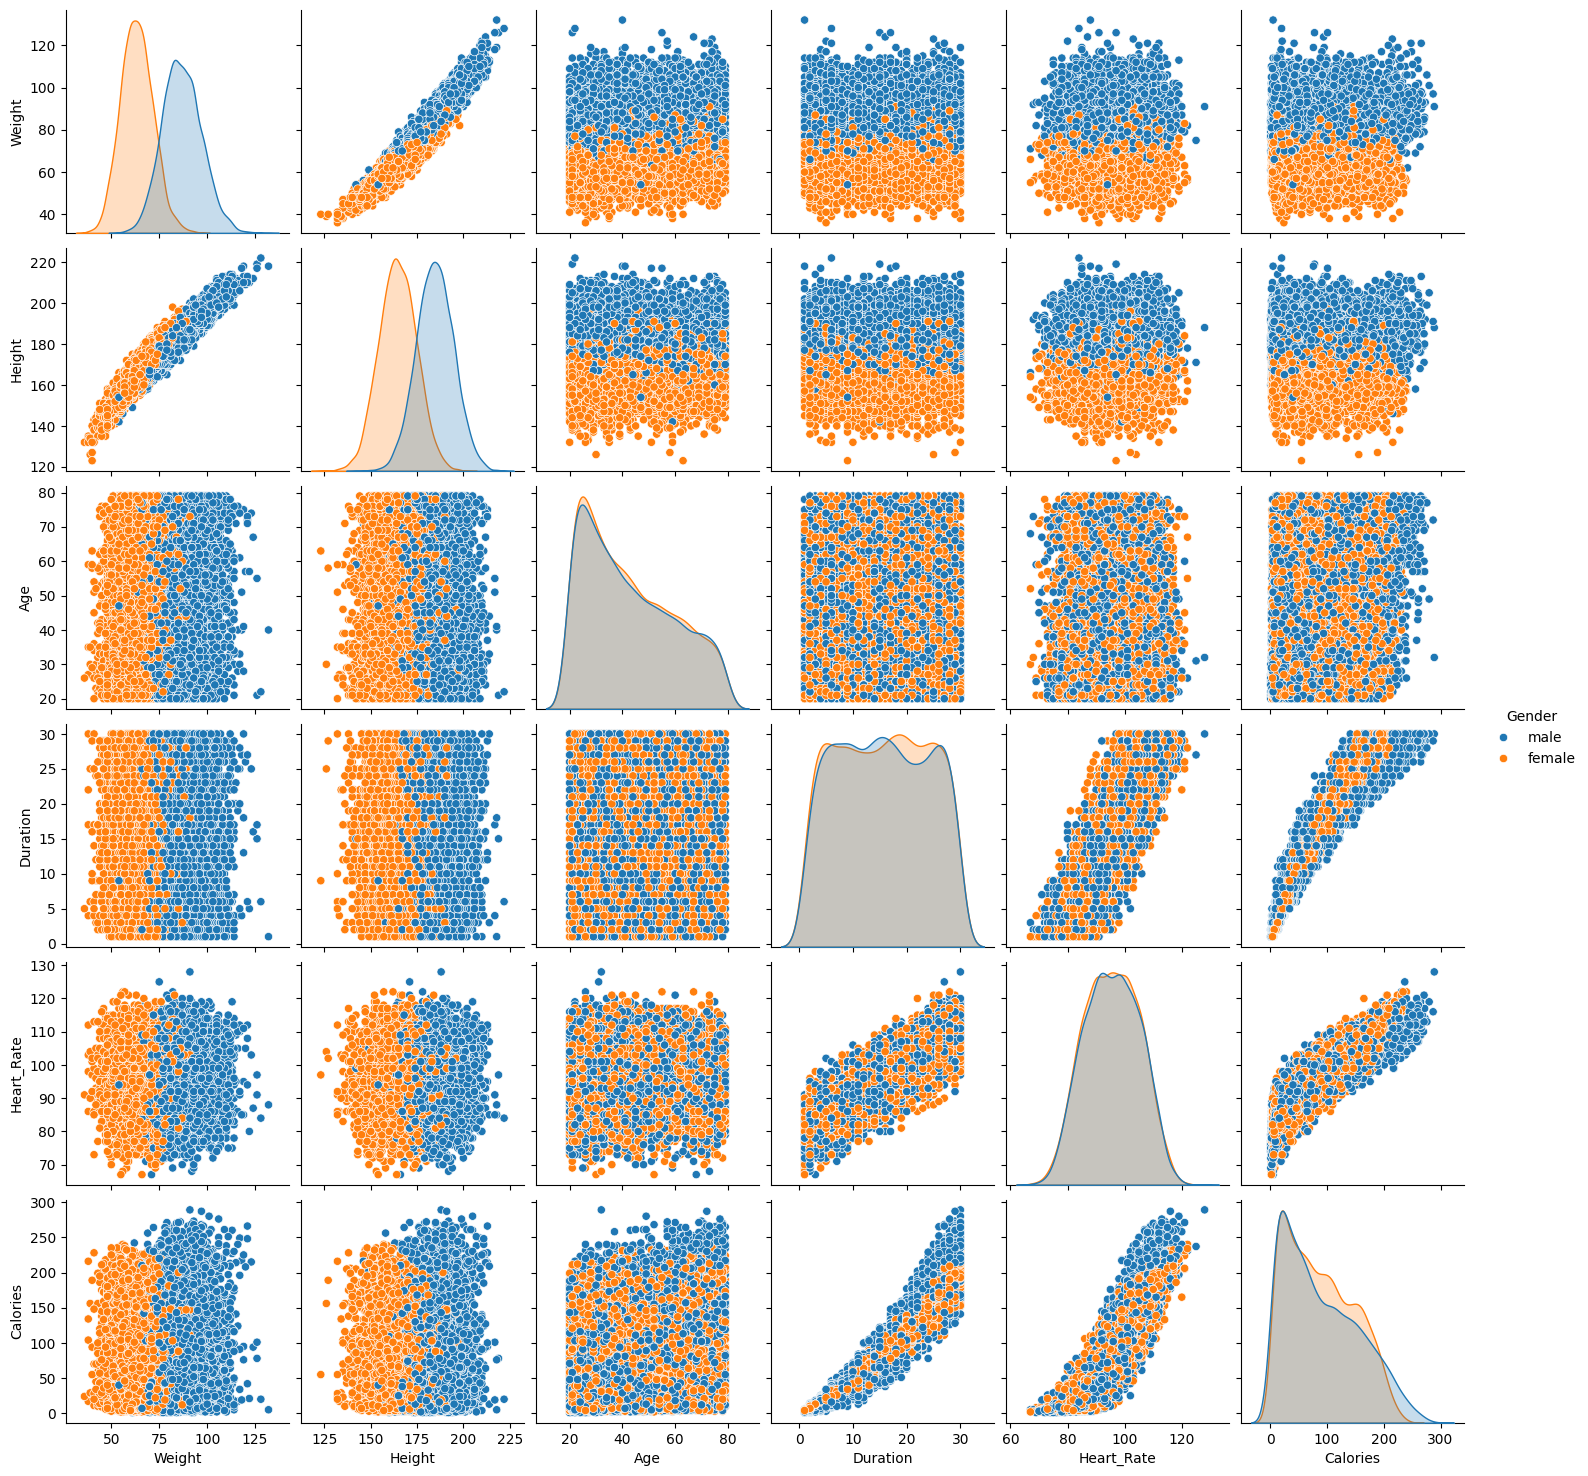

In [18]:
sns.pairplot(exercise_train[["Weight" , "Height" , "Age" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

From the graphs above, we can conclude the following :


1.   There is no specific correlation between some pair of features like Duration and Height, Duration and Weight. Also we can observe that the Age is not correlated with any of the features
2.   There is a low correlation between Heart_Rate and Duration
3.   Height and Weight are strongly correlated









EXPLORATORY DATA ANALYSIS

For our convenience, we'll convert the continuous data for the Age column into categorical data. In order to do so, we'll divide the total range of age into few named ranges like Young, Old and Middle aged.

First let's find the maximum and the minimum age in the dataset.

In [19]:
print("Maximum age :" , exercise_train["Age"].max())
print("Minimum age :" , exercise_train["Age"].min())

Maximum age : 79
Minimum age : 20


Now let's categorize the age range as follows :
```

```
| Name | Age range |
|----------|----------|
| Young | (20,40) |
| Middle Aged | (41,60) |
| Old | (61,80) |






Now let's find how many young, middle aged and old people are there in the train dataset

In [20]:
age_group = ["Young" , "Middle Aged" , "Old"]
exercise_train["age_group"] = pd.cut(exercise_train["Age"] , bins = [20 , 40 , 60 , 80] , right = False , labels = age_group )
exercise_train["age_group"].value_counts()

,count
age_group,
Young,6029
Middle Aged,3535
Old,2436


<Axes: xlabel='age_group', ylabel='count'>

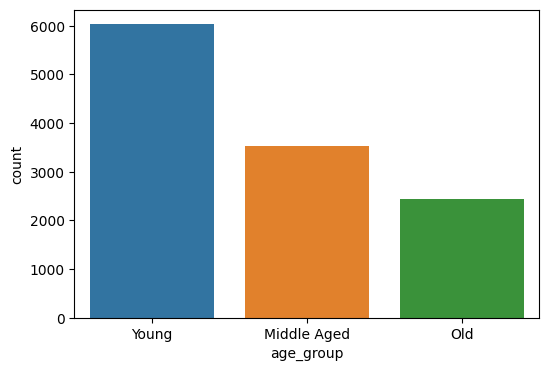

In [21]:
plt.rcParams["figure.figsize"] = 6 , 4
sns.countplot(data = exercise_train , x = "age_group" , hue = "age_group")

So most of the people in this dataset are young people.

Now we'll analyze how much calorie each of the age groups burned. In order to do so we'll use box plots.

In [22]:
fig = px.box(exercise_train , x = "age_group" , y = "Calories" , color = "Gender" )
fig.update_layout(width = 700 , height = 450)
fig.show()

The following points we can observe from the above box plot :


1.  There is an outlier for the 'Young' group as shown by a blue point.
2.  Old people have burned more calories than the other two age groups.
3.  Females in all age groups have burned almost same calories in averages !
4.  The old males outperformed and the young males have the weakest performance.


Next we'll analyze which age group do the exercise for longer duration

In [23]:
fig = px.box(exercise_train , x = "age_group" , y = "Duration" , color = "Gender")
fig.update_layout(width = 800 , height = 450)
fig.show()

From the above box plot we can observe the following:

1.  We can see that every age group have the almost same interquartile range (IQR) and median and this implies that the duration of exercise for each group is almost identical.
2.  In case of old and middle aged groups, males and females have almost same duration. In case of young people, males outperformed.


Next we'll see how many males and females are doing exercise.

<Axes: xlabel='Gender', ylabel='count'>

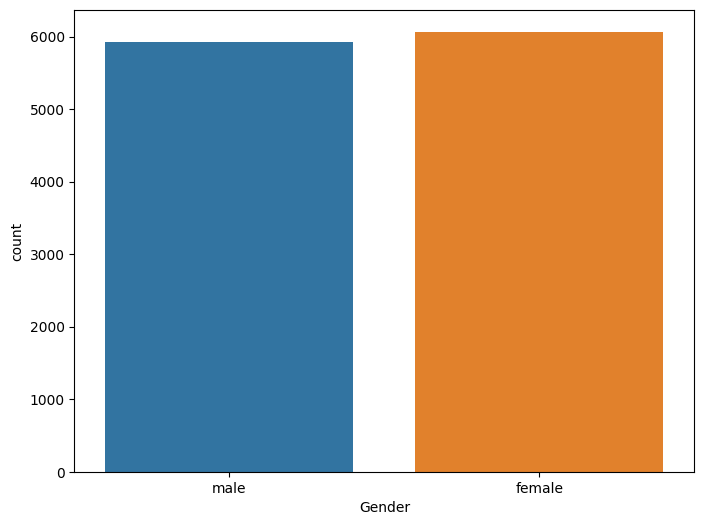

In [24]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train , x = "Gender" , hue = "Gender")

It is seen that the number of females is very slightly higher than the number of males. But we can say that the number of males and females are almost same.


Now let's consider the duration of exercise between males and females (without considering which age group each of them belong)

In [25]:
fig = px.box(exercise_train , x = "Gender" , y = "Duration" , color = "Gender")
fig.update_layout(width = 600 , height = 400)
fig.show()

It is clearly seen from the above box plot that the interquartile range and the median are pretty identical for both males and females.

Now let's plot the heart rate of the people depending on their gender

In [26]:
fig = px.box(exercise_train , x = "Gender" , y = "Heart_Rate" , color = "Gender")
fig.update_layout(width = 500 , height = 400)
fig.show()

There is an outlier for the males. Otherwise the heart rate for both males and females are pretty identical as they have the same interquartile range and median.

Now our goal is to introduce a feature BMI (Body Mass Index). It is calculated as:

$BMI = weight(kg)/(Height(m))^2$

So we'll combine the Height and Weight columns by calculating and then adding the BMI value in the dataset



In [27]:
for data in [exercise_train , exercise_test]:
  data["BMI"] = data["Weight"]/((data["Height"] / 100) ** 2)
  data["BMI"] = round(data ["BMI"] , 2)


Now let's print the maximum and minimum values of BMI

In [28]:
print("Maximum BMI in train dataset :" , exercise_train["BMI"].max())
print("Maximum BMI in test dataset :" , exercise_test["BMI"].max())
print("Minimum BMI in train dataset :" , exercise_train["BMI"].min())
print("Minimum BMI in test dataset :" , exercise_test["BMI"].min())

Maximum BMI in train dataset : 29.07
Maximum BMI in test dataset : 28.63
Minimum BMI in train dataset : 19.23
Minimum BMI in test dataset : 19.56


In [29]:
bmi_category = ["Very severely underweight" , "Severely underweight" , "Underweight" , "Normal" , "Overweight" , "Obese class I" , "Obese class II" , "Obese class III"]
exercise_train["Category"] = pd.cut(exercise_train["BMI"] , bins = [0, 15, 16, 18.5, 25, 30, 35, 40, 55] , right = False , labels = bmi_category)
exercise_train["Category"] = exercise_train["Category"].astype("object")
exercise_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_group,BMI,Category
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle Aged,22.99,Normal


Now let's see how many people are there in each BMI category

In [30]:
ds = exercise_train["Category"].value_counts().reset_index()
ds.columns = ["Category" , "Count"]
ds

,Category,Count
0,Normal,7819
1,Overweight,4181


So there are 7819 people in normal category and 4181 people in overweight category.

There is no underweight people in the dataset which is justified, because underweight people usually don't go to gym.

<Axes: xlabel='Category', ylabel='Count'>

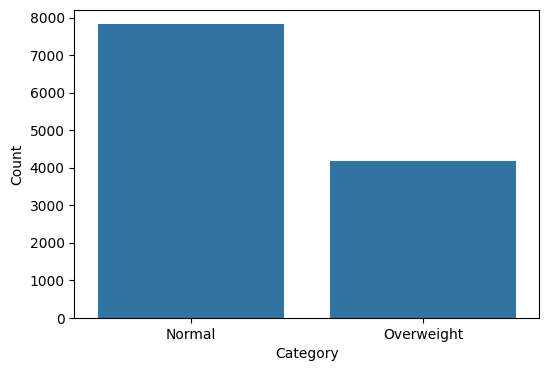

In [31]:
ds = ds[(ds ["Category"] == "Normal") | (ds ["Category"] == "Overweight")]
plt.rcParams["figure.figsize"] = 6 , 4
sns.barplot(data = ds , x = "Category" , y = "Count" )

So more normal people do exercise than overweight individuals.

Now this includes both males and females in each category. Let's observe how many normal and overweight people are males and how many are females

In [32]:
ds = exercise_train[["Category" , "Gender"]].value_counts().reset_index().sort_values(by = ["Category" , "Gender"])
ds.columns = [ "Category" , "Gender" , "Count"]
ds


,Category,Gender,Count
0,Normal,female,5572
2,Normal,male,2247
3,Overweight,female,496
1,Overweight,male,3685


<Axes: xlabel='Category', ylabel='Count'>

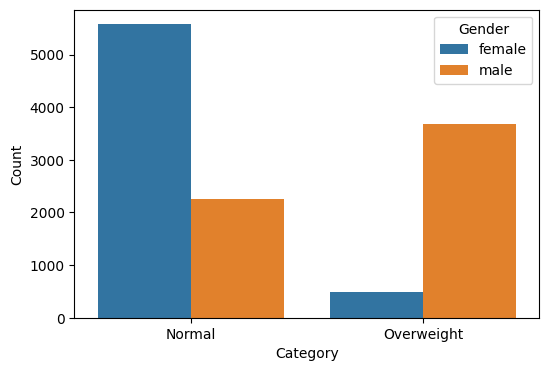

In [33]:
plt.rcParams["figure.figsize"] = 6,4
sns.barplot(data = ds , x = "Category" , y = "Count" , hue = "Gender")

So most of the females are normal and most of the males are overweight.

Now let's observe how many normal and overweight people belong to each age group


In [34]:
ds = exercise_train[["Category" , "age_group"]].value_counts().reset_index().sort_values(by = ["Category" , "age_group"])
ds.columns = [ "Category" , "age_group" , "Count"]
ds

,Category,age_group,Count
0,Normal,Young,4369
1,Normal,Middle Aged,2197
4,Normal,Old,1253
2,Overweight,Young,1660
3,Overweight,Middle Aged,1338
5,Overweight,Old,1183


<Axes: xlabel='Category', ylabel='Count'>

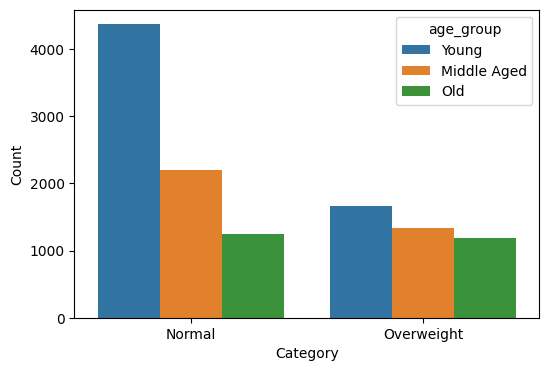

In [35]:
plt.rcParams["figure.figsize"] = 6,4
sns.barplot(data = ds , x = "Category" , y = "Count" , hue = "age_group")

For old age group, the number of overweight and normal people are pretty equal. But for young and middle aged people, the number of normal people is greater than number of overweight individuals.

The number of young and normal BMI people is the highest of all.

In [36]:
Gender_codes = {'female': 0, 'male': 1}
exercise_df['Gender_code'] = exercise_df.Gender.map(Gender_codes)

In [37]:
exercise_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_code
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [38]:
exercise_train = exercise_train[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test = exercise_test[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train = pd.get_dummies(exercise_train, drop_first = True)
exercise_test = pd.get_dummies(exercise_test, drop_first = True)

Categorical column Gender is converted into numerical column

<Axes: >

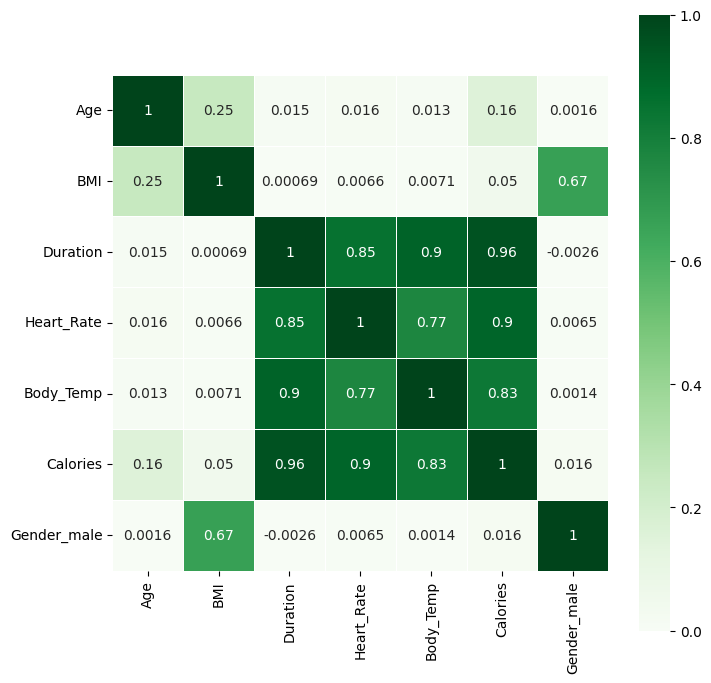

In [39]:
plt.rcParams["figure.figsize"] = 8 , 8
corr = exercise_train.corr()
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Greens')



*   The above heatmap shows correlation between each pair of features in each cell
*   Weight and Height have high correlation according to this heatmap. But they are combined together as BMI. So we drop Height and Weight columns. In that place BMI is saved
*   If two or more features have a high correlation , one of them is saved and rest are dropped. This way the efficiency of the model is also increased



In [52]:
X_train = exercise_train.drop("Calories" , axis = 1)
y_train = exercise_train["Calories"]

X_test = exercise_test.drop("Calories" , axis = 1)
y_test = exercise_test["Calories"]

X and y are separated into train and test set

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 6)
(3000, 6)
(12000,)
(3000,)


**Learning Curve**


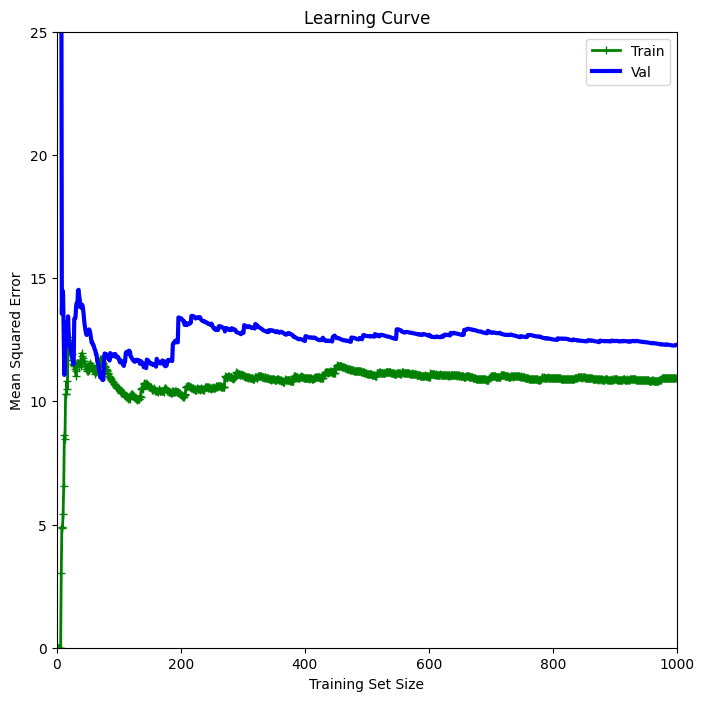

In [42]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(X_train[:m] , y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "g-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

It is observed from the above plot that both curves plateaued at 800 in training set size axis. This means if the training set size is increase beyond 800 examples, model's performance will not be improved significantly.Also the the training set size can reduced  up to 800 examples without decreasing the model's performance.

REGRESSION MODEL

In [43]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)


In [44]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))


Linear Regression Mean Absolute Error(MAE) :  8.52
Linear Regression Mean Squared Error(MSE) :  140.08
Linear Regression Root Mean Squared Error(RMSE) :  11.84


So here we have just implemented a simple Linear Regression model to predict the calories burned with various parameters.

**Random Forest Regressor Algorithm**

*  Here  I will be using the GridSearchCV  of the cross-validation methods that we use for selecting hyperparameters.


In [45]:
forest_reg = RandomForestRegressor()
param_grid = {'n_estimators' : [10 , 100 , 1000] ,
               'max_features' : [2 , 2 , 3] ,
               'max_depth' : [2 , 4 , 6]}

grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , n_jobs = -1 , verbose = 3)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [46]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)

In [48]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [49]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))


RandomForest Mean Absolute Error(MAE) :  5.33
RandomForest Mean Squared Error(MSE) :  69.64
RandomForest Root Mean Squared Error(RMSE) :  8.34


So it is evident that Random Forest Regressor is better for prediction than the Linear Regression.

In [50]:
exercise_train.iloc[32]

,5897
Age,23
BMI,24.88
Duration,27.0
Heart_Rate,102.0
Body_Temp,40.3
Calories,140.0
Gender_male,True


In [55]:
X_array = np.array([[22 , 25 , 26 , 101 , 40 , 1]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Calories : " , round(y_pred[0] , 2))

Calories :  139.27


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



So the predicted value is very close to the real value in the given dataset.